In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
from astropy.io import fits
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))
# ^This import is to have a larger display on the output, I'm not sure how to
# do that in Notebook

# find and open the flat FITS files that were exposed for 30% saturation and store them all in one list
file_prefix = "lab1_3_3_series.0000000"
file_end = ".FIT"
flat_data = [None]*10
for i in range(0, 10, 1):
    filename = file_prefix + str(i) + file_end
    list = fits.open('images/'+filename)
    image_data = list[0].data
    flat_data[i] = image_data


In this box I just opened up all of the flat images and stored them in a list, so I can use this list to find the median of the values.

In [3]:
median_values = []
values = [flat_data[x] for x in range(0,10)]
# print(values)
median_values.append(np.median(values, axis=0))
median_values = median_values[0]


In this box I just calculated the median value of each pixel for the flat fields. I did this quicker than the method I had before by not listing through every single pixel. When I did this it creates an array of the shape (1, 1024, 1024), so I just reassigned it so that it has the shape (1024, 1024).

Darkest parts are receiving 91.71% of the light 
Pixels in the corner receive 92.96 of the light


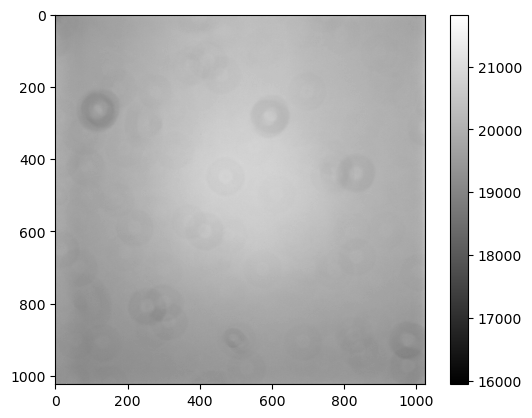

In [4]:
plt.imshow(median_values, cmap='gray')
plt.imsave("median_flat_field.png", median_values, cmap='gray')
plt.colorbar()

if os.path.isfile('median_flat_field.fits') == True:   
    hdu = fits.PrimaryHDU(median_values)
    hdu.writeto('median_flat_field.fits', overwrite=True)
    
brightest_found = 20846
darkest_found = 19117

center_count = 20761
corner_count = 19300

print(f"Darkest parts are receiving {darkest_found/brightest_found * 100:.2f}% of the light ")
print(f"Pixels in the corner receive {corner_count/center_count * 100:.2f} of the light")

Here I'm just plotting the master flat without normalizing it just to see how it looks. I also did the ds9 part of the lab here to find the values of the pixels in the brightest and darkest areas, and the center and corner areas. To find how many counts these spots find relative to each other I just found there ratio and turn it into a percentage. The darkest parts of our image are only receiving about 91.71% of the light. If we took a star from the center and then moved it to the corners, we would see the magnitude drop by 92.96%. I also have it to where the code saves the file if it doesn't already exist, so that we can analyze it in ds9 as a fits file.

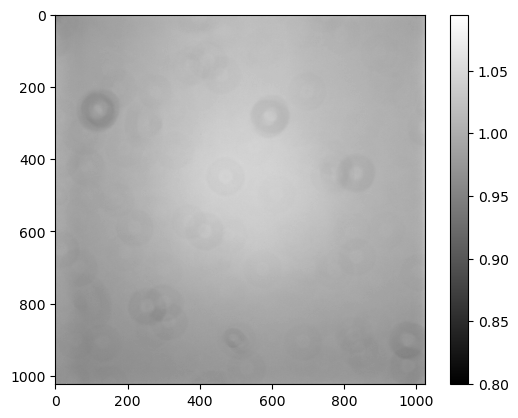

In [6]:
flat_median = median_values.flatten()
median = np.median(flat_median)
normalized_flat = median_values / median
plt.imshow(normalized_flat, cmap='gray')
plt.colorbar()

In this box we're just normalizing the pixels of the master flat to the median value. To do that we're just flattening the data and dividing our master flat by this value. We plot it again to see how it changes with this value.

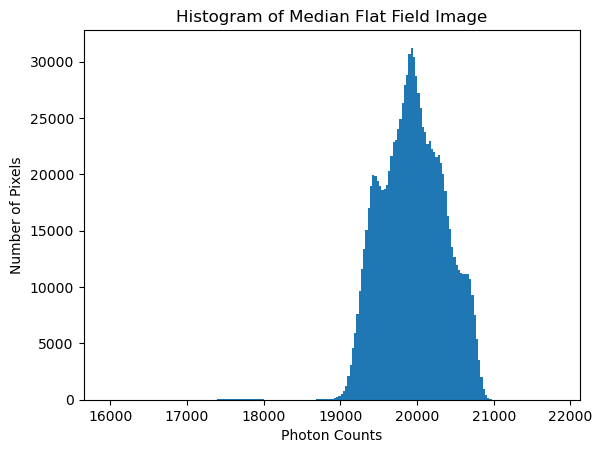

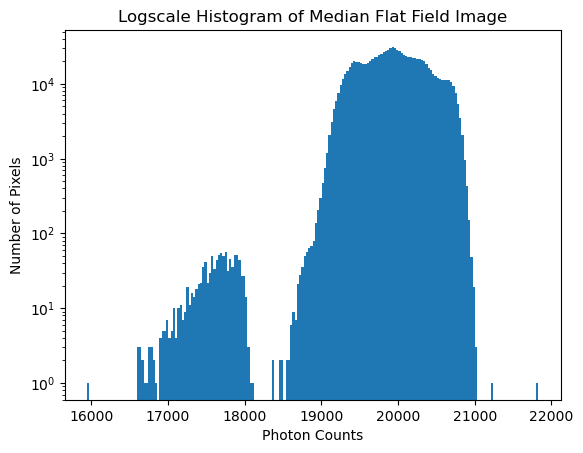

In [7]:
histogram = plt.hist(flat_median, range=(np.min(flat_median), np.max(flat_median)), bins=200)
plt.xlabel('Photon Counts')
plt.ylabel("Number of Pixels")
plt.title("Histogram of Median Flat Field Image")
plt.show()
histogram = plt.hist(flat_median, range=(np.min(flat_median), np.max(flat_median)), bins=200)
plt.xlabel('Photon Counts')
plt.ylabel("Number of Pixels")
plt.title("Logscale Histogram of Median Flat Field Image")
plt.yscale("log")
plt.show()

Here we're just plotting a histogram of our mamster flat data to see if there are any dead pixels. The lowest pixel seems to be at around 16000, which is certainly not dead, so there isn't really any dead pixels here. We can also see that its not necessarily bimodal, but there is a good amount of data between 16500 and 18300.

If you forgot to take flats on the night of observation, I believe you can take flats another time, as long as its the same exposure and same settings. This is because we take the flats with a uniform lights source, so as long as the telescope and camera settings are the same, it doesn't really matter what day it is taken.